In [2]:
#import standard library 

#data analysis
import pandas as pd
import numpy as np
#plotting
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
telcom = pd.read_csv("Telco-Customer-Churn.csv")
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telcom.isnull().sum() * 100 / len(telcom)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

# Demographics Analysis

# 1a. 2 demographics most popular with the telco brand


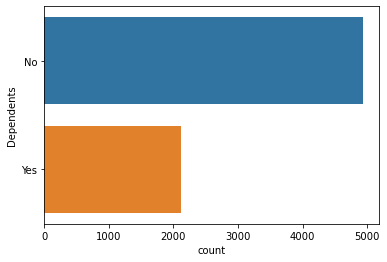

In [5]:
def bar_plot(telcom,column):    
    ax = sns.countplot(y=column, data=telcom)

bar_plot(telcom, "Dependents")


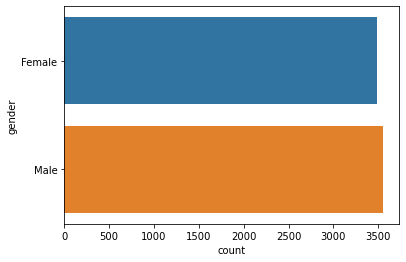

In [6]:
bar_plot(telcom, "gender")


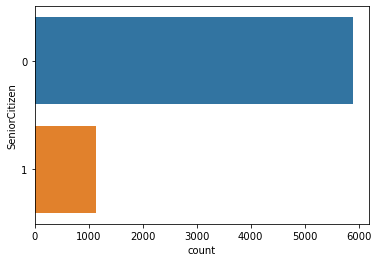

In [7]:
bar_plot(telcom, "SeniorCitizen")

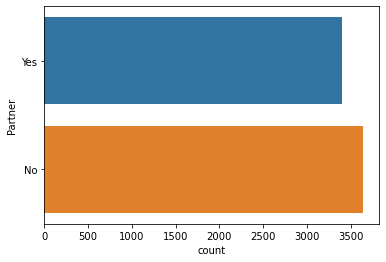

In [8]:
bar_plot(telcom, "Partner")

<AxesSubplot:xlabel='Partner', ylabel='count'>

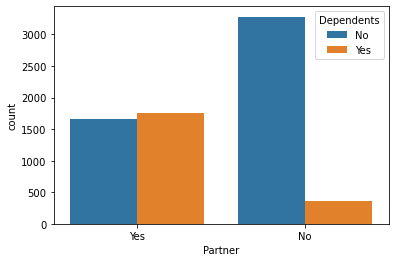

In [9]:
sns.countplot("Partner", data=telcom, hue = 'Dependents')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

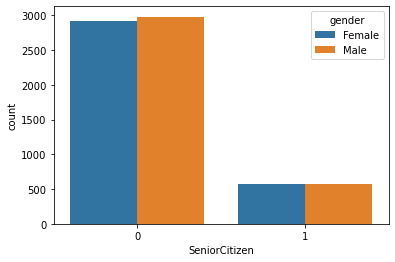

In [10]:
sns.countplot("SeniorCitizen", data=telcom, hue = 'gender')

Analysis

The telcom brand is more popular with the young people who make up 84% percent of the customers. Also it is popular with those who dont have partners and dependents as the graph shows that they are about 70% of the data set. 

# b. Increasing customer retention

The marketing team should target their advertising more young customers and those without dependents.They are the most popular demograph for the telcom brand and also they use most of the telcoms products. The marketing team should also target the demograph without dependents

# Services

 Which 3 services are contributing to a higher monthly charge and resulting to 
customers churning? (Use visualizations in explaining your analysis)



In [11]:
gp_phone = telcom.groupby("MultipleLines")["MonthlyCharges"].sum()
gp_phone.head()

MultipleLines
No                  183721.25
No phone service     28663.50
Yes                 243731.85
Name: MonthlyCharges, dtype: float64

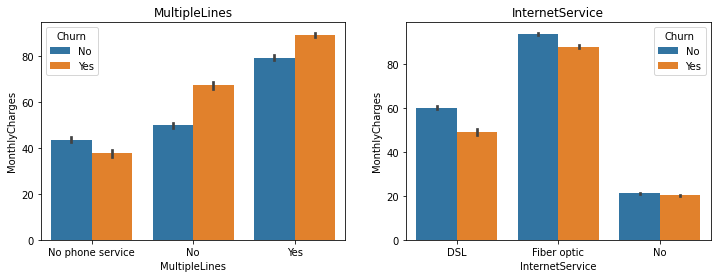

In [12]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("MultipleLines")
axis[1].set_title("InternetService")
axis_y = "MonthlyCharges"

# Plot Multiple Lines column
ax = sns.barplot(x= "MultipleLines", y= "MonthlyCharges", hue='Churn', data=telcom, ax=axis[0])

# Plot Internet Service column
ax = sns.barplot(x="InternetService", y= "MonthlyCharges", hue='Churn', data=telcom, ax=axis[1])
fig.savefig('par.png')

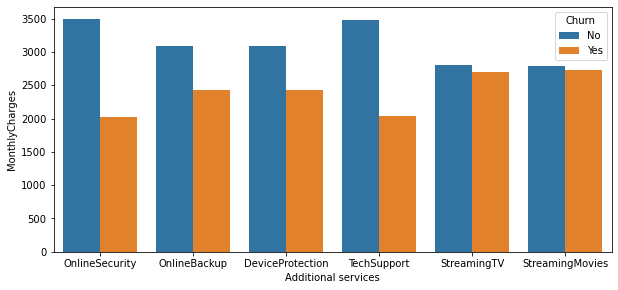

In [13]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(telcom[telcom["InternetService"] != "No"][cols]).rename({'value': 'Churn'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Churn')
ax.set(xlabel='Additional services', ylabel='MonthlyCharges')
plt.show()

From the plots above we can conclude that:
1. Streaming Services are contributing to a higher monthly charge at the same time resulting to customer churning. Both streaming movies and TV have a higher number of churned customers than the other additional internet services
2. Multiple line services are also contributing to a monthly charge and hugh customer churning rate
3. The Fibre optic monthly rate is also contributing greatly to high monthly charges and high churning rate.


# Phone as a standalone service


b. If the telco was to offer Phone as a standalone service, which type of contract 
would encourage customer retention?



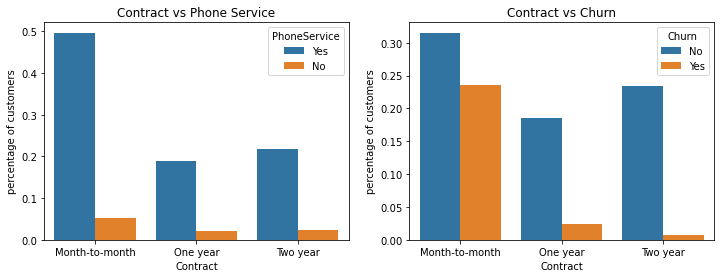

In [14]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Contract vs Phone Service")
axis[1].set_title("Contract vs Churn")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = telcom.groupby('Contract')["PhoneService"].value_counts()/len(telcom)
gp_partner = gp_partner.to_frame().rename({"PhoneService": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Contract', y= axis_y, hue='PhoneService', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = telcom.groupby('Contract')["Churn"].value_counts()/len(telcom)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Contract', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])
fig.savefig('par.png')

Analysis

1. The two year contract encourages customer retention as it requires more commitment than a one month contract that can easily be cancelled.

# 3a.Payment 

In [33]:
bouquets = ["PhoneService","MultipleLines",
                    "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
                    "TechSupport","StreamingTV","StreamingMovies",
                    ]
target_col = 'Churn'

# 1. Basic Package

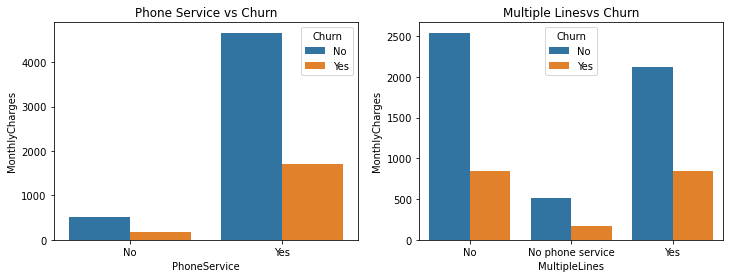

In [65]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Phone Service vs Churn")
axis[1].set_title("Multiple Linesvs Churn")
axis_y = "MonthlyCharges"

# Plot Phone Service column
gp_phone = telcom.groupby('PhoneService')["Churn"].value_counts()
gp_phone = gp_phone.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='PhoneService', y= axis_y, hue='Churn', data=gp_phone, ax=axis[0])
# Plot Multiple Lines column
gp_multiple = telcom.groupby('MultipleLines')["Churn"].value_counts()
gp_multiple = gp_multiple.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='MultipleLines', y= axis_y, hue='Churn', data=gp_multiple, ax=axis[1])
fig.show()

The basic package can consist of the phone service and multiple lines service.

# 2. Plus Package

The plus package will have the internet service plus the phone and multiple lines

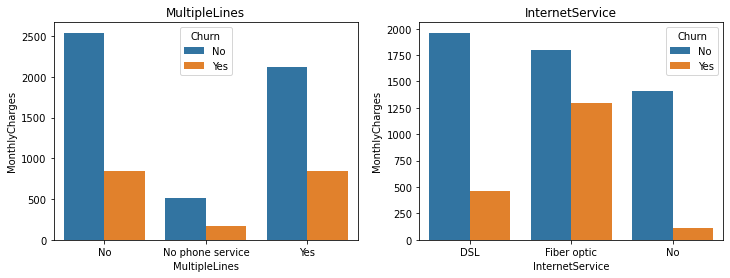

In [67]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("MultipleLines")
axis[1].set_title("InternetService")
axis_y = "MonthlyCharges"

# Plot Multiple Lines column
gp_multiple = telcom.groupby('MultipleLines')["Churn"].value_counts()
gp_multiple = gp_multiple.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='MultipleLines', y= axis_y, hue='Churn', data=gp_multiple, ax=axis[0])

# Plot Internet Service column
# Plot Multiple Lines column
gp_internet = telcom.groupby('InternetService')["Churn"].value_counts()
gp_internet = gp_internet.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='InternetService', y= axis_y, hue='Churn', data=gp_internet, ax=axis[1])
fig.show()

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

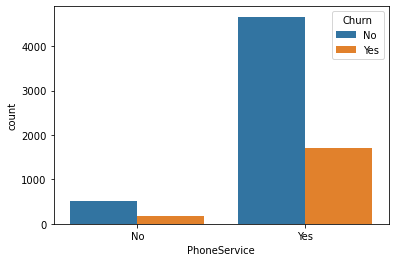

In [61]:
# Plot Phone Service column
sns.countplot("PhoneService", data=telcom, hue = 'Churn')

# 3. Premium Package

The premium package can consist of all the services offered by the telcom company

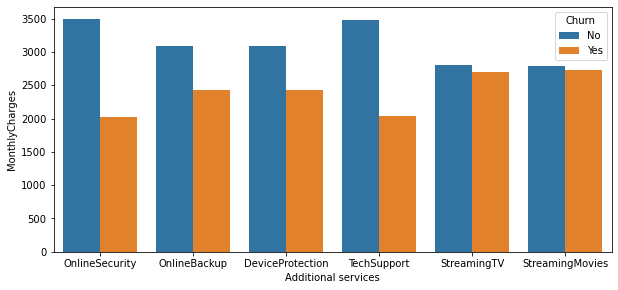

In [45]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(telcom[telcom["InternetService"] != "No"][cols]).rename({'value': 'Churn'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Churn')
ax.set(xlabel='Additional services', ylabel='MonthlyCharges')
plt.show()

# Analysis

The plus package has less churning whilst offering affordable charges and providing services that can cater for all the customer demographics hence the Plus package is appropriate and able to kep the customers from churn

# b. Monthly billings


In [29]:
data = telcom['PaperlessBilling']
labels = ['Paperless Billing', 'No Paperless Billing']
values = [4172, 2872]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.show()

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

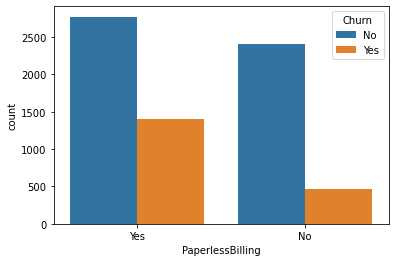

In [30]:
sns.countplot("PaperlessBilling", data=telcom, hue = 'Churn')

# Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?


The company should do paperless billing as it seems popular with the customers however it is also important to note that customers with paperless billing have a higher churn rate than those without.